### Assignment
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
* Download 'nba_2013.csv' file from this link: https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:
    
* player - name of the player
* pos - the position of the player
* g - number of games the player was in
* gs - number of games the player started
* pts - total points the player scored

There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [4]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [5]:
for col in nba:
    if nba[col].dtypes == 'object':
        print(col)

player
pos
bref_team_id
season


In [6]:
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
X = nba.drop(['season','season_end', 'player','pts'],axis = 1)
y = nba['pts']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 42)

In [9]:
X.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,SF,23,TOT,63,0,847,66,141,0.468,4,...,53,0.660,72,144,216,28,23,26,30,122
1,C,20,OKC,81,20,1197,93,185,0.503,0,...,136,0.581,142,190,332,43,40,57,71,203
2,PF,27,TOT,53,12,961,143,275,0.520,0,...,119,0.639,102,204,306,38,24,36,39,108
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,...,336,0.815,32,230,262,248,35,3,146,136
4,C,25,NOP,56,30,951,136,249,0.546,0,...,67,0.836,94,183,277,40,23,46,63,187


In [10]:
X_train = X_train.copy()

X_train['missing_x3p.'] = X_train['x3p.'].isna().astype(int)

In [11]:
X_train.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,missing_x3p.
66,SG,23,PHI,26,0,224,26,86,0.302,3,...,0.692,8,20,28,41,13,3,16,19,0
397,PG,26,NYK,2,0,2,0,0,NaN,0,...,NaN,0,0,0,0,0,0,0,0,1
86,PF,25,HOU,71,2,1283,173,410,0.422,61,...,0.680,55,205,260,88,44,14,72,100,0
31,C,28,NYK,42,39,1257,222,502,0.442,30,...,0.824,69,153,222,45,14,52,58,100,0
84,SG,37,DAL,81,0,1973,330,811,0.407,146,...,0.821,67,217,284,212,61,35,108,209,0


In [12]:
X_train['x3p.'].fillna(value = X_train['x3p.'].mean(), inplace = True)

In [13]:
X_train['missing_ft.'] = X_train['ft.'].isna().astype(int) 

In [14]:
X_train['ft.'].fillna(value = X_train['ft.'].mean(), inplace = True)
X_train['fg.'].fillna(method = 'ffill', inplace = True)
X_train['x2p.'].fillna(method = 'ffill', inplace = True)
X_train['efg.'].fillna(method = 'ffill', inplace = True)

In [15]:
X_test = X_test.copy()
X_test['missing_x3p.'] = X_test['x3p.'].isna().astype(int)

In [16]:
X_test['x3p.'].fillna(value = X_test['x3p.'].mean(), inplace = True)

In [17]:
X_test.loc[:,'missing_ft.'] = X_test['ft.'].isna().astype(int)

In [18]:
X_test['ft.'].fillna(value = X_test['ft.'].mean(), inplace = True)
X_test['fg.'].fillna(method = 'ffill', inplace = True)
X_test['x2p.'].fillna(method = 'ffill', inplace = True)
X_test['efg.'].fillna(method = 'ffill', inplace = True)

In [19]:
X_test.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,orb,drb,trb,ast,stl,blk,tov,pf,missing_x3p.,missing_ft.
73,SF,33,TOT,56,13,1419,213,540,0.394,98,...,21,208,229,82,47,17,60,120,0,0
415,PG,23,BRK,23,3,270,31,91,0.341,3,...,3,12,15,36,12,1,31,29,0,0
392,C,23,TOT,46,25,875,130,274,0.474,0,...,104,133,237,52,28,20,41,116,0,0
278,PG,27,TOR,79,79,2862,457,1080,0.423,190,...,88,281,369,586,121,15,194,267,0,0
400,SF,28,NYK,74,37,2421,396,955,0.415,189,...,35,261,296,219,65,20,108,196,0,0


In [20]:
le1 = LabelEncoder()
le2 = LabelEncoder()

In [21]:
X_train['encoded_pos'] = le1.fit_transform(X_train['pos'])

In [22]:
X_train['encoded_bref_team_id'] = le2.fit_transform(X_train['bref_team_id'])

In [23]:
X_test['encoded_pos'] = le1.transform(X_test['pos'])

In [24]:
X_test['encoded_bref_team_id'] = le2.transform(X_test['bref_team_id'])

In [25]:
X_test.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,trb,ast,stl,blk,tov,pf,missing_x3p.,missing_ft.,encoded_pos,encoded_bref_team_id
73,SF,33,TOT,56,13,1419,213,540,0.394,98,...,229,82,47,17,60,120,0,0,5,28
415,PG,23,BRK,23,3,270,31,91,0.341,3,...,15,36,12,1,31,29,0,0,4,2
392,C,23,TOT,46,25,875,130,274,0.474,0,...,237,52,28,20,41,116,0,0,0,28
278,PG,27,TOR,79,79,2862,457,1080,0.423,190,...,369,586,121,15,194,267,0,0,4,27
400,SF,28,NYK,74,37,2421,396,955,0.415,189,...,296,219,65,20,108,196,0,0,5,19


In [26]:
X_train.drop(['pos','bref_team_id'],axis = 1,inplace = True)

In [27]:
X_test.drop(['pos','bref_team_id'],axis = 1,inplace = True)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
scaler_X_train = scaler.fit_transform(X_train,y_train)
scaler_X_test = scaler.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [31]:
k_reg = KNeighborsRegressor(n_neighbors = 5)
k_reg.fit(scaler_X_train,y_train)
score = k_reg.score(scaler_X_test,y_test)

In [32]:
score

0.9748047834100404

In [33]:
score = []
for i in range(13):
    k_reg = KNeighborsRegressor(n_neighbors = i+1)
    k_reg.fit(scaler_X_train,y_train)
    score.append(k_reg.score(scaler_X_test,y_test))

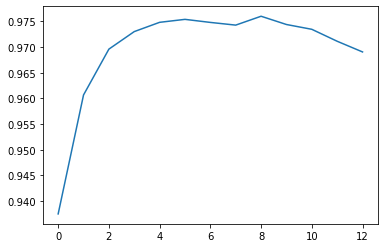

In [34]:
plt.plot(range(13),score)

In [35]:
X_train.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,trb,ast,stl,blk,tov,pf,missing_x3p.,missing_ft.,encoded_pos,encoded_bref_team_id
66,23,26,0,224,26,86,0.302,3,30,0.100000,...,28,41,13,3,16,19,0,0,6,22
397,26,2,0,2,0,0,0.302,0,0,0.294179,...,0,0,0,0,0,0,1,1,4,19
86,25,71,2,1283,173,410,0.422,61,176,0.346591,...,260,88,44,14,72,100,0,0,3,10
31,28,42,39,1257,222,502,0.442,30,108,0.277778,...,222,45,14,52,58,100,0,0,0,19
84,37,81,0,1973,330,811,0.407,146,371,0.393531,...,284,212,61,35,108,209,0,0,6,6
